In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [1]:
##
##
##
## preprocessing du dataset
##
##  
## 

In [1]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
#on rassemble tous les datasets

In [2]:

data_1 = pd.read_csv("data1.csv")
for dataseti in range(2,16):
    data_1 = pd.concat([data_1,  pd.read_csv("data"+str(dataseti)+".csv")],ignore_index = True)

In [4]:
len(data_1)

78377

In [5]:
##
##
##
## description du dataset 
##
##
## 

In [6]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,...,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,...,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [8]:
print(pd.Series(data_1['marker']).value_counts())

Attack      55663
Natural     18309
NoEvents     4405
Name: marker, dtype: int64


In [3]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 1,'NoEvents':0})

In [10]:
data_1.isnull().values.any() #nan values?

False

In [11]:
data_1.isnull().any().any()

False

In [12]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [13]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [14]:
rows_with_infini[rows_with_infini['marker']==1].count()
# il y a des valeurs infinies

R1-PA1:VH     2086
R1-PM1:V      2086
R1-PA2:VH     2086
R1-PM2:V      2086
R1-PA3:VH     2086
              ... 
snort_log1    2086
snort_log2    2086
snort_log3    2086
snort_log4    2086
marker        2086
Length: 129, dtype: int64

In [4]:
#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [16]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [5]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [18]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
data_1_x = data_1.drop(['marker'],axis=1)

In [8]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [22]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.695555,0.842210,0.362295,0.842184,0.028936,0.841983,0.682477,0.340502,0.341652,0.495226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.704691,0.859411,0.371383,0.859388,0.038103,0.859339,0.699538,0.271764,0.358475,0.395833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.704818,0.859577,0.371510,0.859553,0.038231,0.859504,0.699475,0.271764,0.358571,0.395833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705789,0.861396,0.372497,0.861373,0.039202,0.861322,0.700430,0.271352,0.359892,0.394387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.707094,0.864704,0.373818,0.864682,0.040475,0.864628,0.700334,0.272278,0.361070,0.393229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.893314,0.869997,0.560019,0.869975,0.226711,0.869917,0.898201,0.173904,0.561547,0.248987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78373,0.893139,0.870493,0.559908,0.870306,0.226551,0.870248,0.897262,0.174419,0.560879,0.249277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78374,0.892693,0.870989,0.559430,0.870802,0.226074,0.870744,0.894318,0.176065,0.559016,0.250579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78375,0.892645,0.870989,0.559367,0.870802,0.226058,0.870909,0.893984,0.175962,0.558873,0.250868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#on prépare un dataset Feature selection

In [23]:
################## feature selection

In [24]:
skb = SelectKBest(chi2, k=80)

In [25]:
X_new = skb.fit_transform(data_1.drop(['marker'],axis=1), data_1['marker'])

In [26]:
X_new.shape

(78377, 80)

In [27]:
mask = skb.get_support()
new_features = data_1.drop(['marker'],axis=1).columns[mask]

In [28]:
data_1_Selectedfeatures = pd.DataFrame(X_new,columns=new_features)
data_1_Selectedfeatures = pd.concat([data_1_Selectedfeatures,data_1['marker']],axis=1)


In [29]:
data_1_Selectedfeatures

,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA4:IH,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM8:V,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log3,snort_log4,marker
0,0.695555,0.362295,0.028936,0.682477,0.341652,0.495226,0.017794,0.476812,0.695634,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.704691,0.371383,0.038103,0.699538,0.358475,0.395833,0.034745,0.381014,0.704754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.704818,0.371510,0.038231,0.699475,0.358571,0.395833,0.034872,0.380725,0.704882,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705789,0.372497,0.039202,0.700430,0.359892,0.394387,0.035302,0.381014,0.705868,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.707094,0.373818,0.040475,0.700334,0.361070,0.393229,0.034808,0.383623,0.707158,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.893314,0.560019,0.226711,0.898201,0.561547,0.248987,0.230766,0.245942,0.893393,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78373,0.893139,0.559908,0.226551,0.897262,0.560879,0.249277,0.229715,0.246812,0.893234,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78374,0.892693,0.559430,0.226074,0.894318,0.559016,0.250579,0.227455,0.248406,0.892757,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78375,0.892645,0.559367,0.226058,0.893984,0.558873,0.250868,0.227296,0.248551,0.892725,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#on prépare un dataset PCA

In [30]:
######################### pca

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 50)

In [33]:
Y = data_1.drop(list_ndiscrt,axis=1)

In [34]:
principalComponents = pca.fit_transform(data_1.drop(['marker'],axis=1))

In [35]:
data_1_pca = pd.DataFrame(data = principalComponents)

In [36]:
data_1_pca = pd.concat([data_1_pca,Y],axis=1)
data_1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,marker
0,1.439561,-0.574008,0.427594,-0.052006,0.713022,0.783205,0.931683,-0.433132,-0.395550,0.250798,...,0.007442,-0.003222,0.014061,0.003915,-0.001630,0.005225,0.016768,-0.003043,0.000691,0
1,1.454874,-0.575815,0.433689,0.072278,-0.413596,0.279650,0.748120,0.166276,-0.300513,0.200395,...,0.002269,-0.001611,0.006518,0.003197,0.000620,-0.006476,0.003155,0.001299,-0.008016,0
2,1.454877,-0.575865,0.433093,0.072201,-0.413361,0.279379,0.748205,0.166047,-0.299468,0.200180,...,0.002211,-0.001573,0.006394,0.003205,0.000811,-0.006045,0.002906,0.001401,-0.007909,0
3,1.459311,-0.574996,0.434782,0.071794,-0.413173,0.276163,0.750830,0.164549,-0.316267,0.194711,...,0.001672,-0.001401,0.005323,0.003114,0.000881,-0.006363,0.001047,0.001834,-0.007544,0
4,1.460796,-0.576178,0.435657,0.072718,-0.412762,0.270749,0.751830,0.160140,-0.317839,0.189884,...,0.000799,-0.001300,0.003052,0.003182,0.000962,-0.005708,-0.002392,0.003531,-0.006448,0


In [37]:
########################## test classifiers sur données brutes

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [10]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [40]:
## decision tree

In [41]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [42]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8464253817037384

In [43]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1167,    44,   132],
       [   35,  3917,  1564],
       [  125,  1711, 14818]])

In [44]:
## random forest

In [45]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.914005018500404

In [46]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1245,     6,    92],
       [    2,  3938,  1576],
       [    7,   339, 16308]])

In [47]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.95879861, 0.80375549, 0.94184233])

Text(0.5, 1.0, 'importance de la feature')

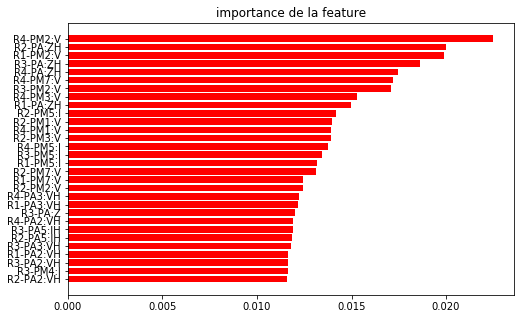

In [48]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [49]:
########## autres

In [50]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.856404958677686

In [51]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7604597107438017

In [52]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.10911673553719008

In [53]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7126807851239669

In [49]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8517415897588568

In [13]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 500, n_jobs = -1)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9305065283034917

In [51]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.95421316, 0.84544125, 0.95112958])

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', ExtraTreesClassifier()),
     ('hist', HistGradientBoostingClassifier() ),
     ('dtre',  tree.DecisionTreeClassifier() ),
    ('knn',  KNeighborsClassifier() )
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=AdaBoostClassifier()
)



clf.fit(data_1_train_x, data_1_train_y).score(data_1_test_x, data_1_test_y)

In [52]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9268489771615702

In [57]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.22611053719008264

In [58]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.4515754132231405

In [53]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(200,100,100,30), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.6330115255390635

In [60]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7143595041322314

In [61]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9008264462809917

In [62]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=tree.ExtraTreeClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.922004132231405

In [63]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=HistGradientBoostingClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.8919163223140496

In [64]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8960485537190083

In [65]:
#######  classifiers with pca

In [66]:
data_1_train = data_1_pca.sample(frac=0.7)
data_1_test = data_1_pca.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [67]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [68]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8473657024793388

In [69]:
confusion_matrix(data_1_test_y, y_dct)

array([[1273,   25,  491],
       [  23,  395,   57],
       [ 499,   87, 4894]])

In [70]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.9027634297520661
[[1276    6  507]
 [  10  404   61]
 [ 155   14 5311]]


In [71]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.846849173553719

In [72]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7333419421487604

In [73]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7115185950413223

In [74]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8663481404958677

In [75]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9178719008264463

In [76]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.29016012396694213

In [77]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.702995867768595

In [78]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.2802169421487603

In [79]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,30,10), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7233987603305785

In [80]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.706224173553719

In [81]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.862474173553719

In [82]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8760330578512396

In [83]:
############# avec kbest

In [84]:
data_1_train = data_1_Selectedfeatures.sample(frac=0.7)
data_1_test = data_1_Selectedfeatures.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [85]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [86]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8398760330578512

In [87]:
confusion_matrix(data_1_test_y, y_dct)

array([[1246,   10,  552],
       [  17,  381,   58],
       [ 543,   60, 4877]])

In [88]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.8702221074380165
[[1034    0  774]
 [  10  364   82]
 [ 136    3 5341]]


In [89]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

confusion_matrix(data_1_test_y, y_dct)

array([[1206,    0,  602],
       [   8,  404,   44],
       [ 161,    4, 5315]])

In [90]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8021694214876033

In [91]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7252066115702479

In [92]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7139721074380165

In [93]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.10601756198347108

In [94]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7084194214876033

In [95]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8254132231404959

In [96]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8522727272727273

In [ ]:
#Feature selection ne fonctionne vraiment pas bien